In [1]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Total population per kreis and density

In [2]:
df_pop = pd.read_csv('Kreis_density.csv')
df_pop.rename(columns={'Kreis': 'kreis'}, inplace=True)

# SPAR Presence vs. Total Supermarket by kreis

In [4]:
# Load the supermarket dataset
supermarkets_df = pd.read_csv('supermarkets_with_kreis.csv')
supermarkets_df.rename(columns={'bezeichnung': 'kreis', 'name_left': 'name'}, inplace=True)

In [5]:
supermarkets_df.head()

name        lat       lng  \
0       Migros-Supermarkt - Zürich - Limmatplatz  47.385463  8.531409   
1  Migros-Supermarkt - Zürich - Albisriederplatz  47.379108  8.508757   
2       Migros-Supermarkt - Zürich - Wollishofen  47.344722  8.530000   
3    Migros Supermarket Zürich Schmiede Wiedikon  47.370077  8.520128   
4              Migros-Supermarkt - Zürich - Pünt  47.375265  8.485693   

                     street    city    type district  \
0         Limmatstrasse 152  Zürich  Migros   Zürich   
1        Badenerstrasse 376  Zürich  Migros   Zürich   
2            Etzelstrasse 3  Zürich  Migros   Zürich   
3  Birmensdorferstrasse 140  Zürich  Migros   Zürich   
4    Albisriederstrasse 365  Zürich  Migros   Zürich   

                      place_id  \
0  ChIJS6CT8QgKkEcRVC558wYywsQ   
1  ChIJP2csREgKkEcRBKI93d184H0   
2  ChIJA0Pf5N4JkEcRD2eKbftCaxc   
3  ChIJfSSTTR4KkEcRF7QYJUbjEPU   
4  ChIJT4C60NYLkEcR4go8AuAy9HE   

                                       place_details  rating  reviews  \
0  {'formatted_address': 'Limmatstrasse 152, 8005...     4.3   2180.0   
1  {'formatted_address': 'Badenerstrasse 376, 800...     4.1    593.0   
2  {'formatted_address': 'Etzelstrasse 3, 8038 Zü...     4.4    772.0   
3  {'formatted_address': 'Birmensdorferstrasse 14...     4.2    784.0   
4  {'formatted_address': 'Albisriederstrasse 365,...     4.2    238.0   

  size_category rating_category                                     geometry  \
0         Large         Average  POINT (8.531409199999999 47.38546299999999)   
1        Medium         Average                 POINT (8.5087575 47.3791083)   
2        Medium         Average  POINT (8.529999999999999 47.34472220000001)   
3        Medium         Average         POINT (8.520128399999999 47.3700773)   
4         Small         Average         POINT (8.485693099999999 47.3752654)   

     kreis  
0  Kreis 5  
1  Kreis 4  
2  Kreis 2  
3  Kreis 3  
4  Kreis 9

In [6]:
# Count total supermarkets per district
total_supermarkets = supermarkets_df.groupby('kreis').size().reset_index(name='total_supermarkets')

# Count SPAR supermarkets per district
spar_supermarkets = supermarkets_df[supermarkets_df['name'].str.contains('spar', case=False)]
spar_counts = spar_supermarkets.groupby('kreis').size().reset_index(name='spar_supermarkets')

# Merge both counts together
supermarket_coverage = pd.merge(total_supermarkets, spar_counts, on='kreis', how='left')

# Fill missing SPAR counts with 0
supermarket_coverage['spar_supermarkets'] = supermarket_coverage['spar_supermarkets'].fillna(0).astype(int)

# Preview result
supermarket_coverage.sort_values(by='spar_supermarkets', ascending=True).head(12)

kreis  total_supermarkets  spar_supermarkets
0    Kreis 1                  12                  0
1   Kreis 10                  10                  0
3   Kreis 12                   8                  0
5    Kreis 3                  15                  0
6    Kreis 4                  17                  0
8    Kreis 6                   8                  0
10   Kreis 8                   8                  0
11   Kreis 9                  25                  1
4    Kreis 2                  15                  2
7    Kreis 5                  19                  2
2   Kreis 11                  30                  3
9    Kreis 7                  14                  3

# Identify High-Opportunity Kreis for SPAR Expansion

In [7]:
# Merge population growth data with supermarket counts
opportunity_df = pd.merge(df_pop, supermarket_coverage, on='kreis', how='left')
opportunity_df.head()

kreis  kreis_number District Name  Area (km²)  pop_2024      Density  \
0   Kreis 7             7      Fluntern       15.02     39713  2644.007989   
1   Kreis 1             1      Altstadt        1.81      5769  3187.292818   
2   Kreis 2             2          Enge       11.07     38247  3455.013550   
3   Kreis 8             8      Riesbach        4.80     17898  3728.750000   
4  Kreis 10            10         Höngg        9.09     41544  4570.297030   

   total_supermarkets  spar_supermarkets  
0                  14                  3  
1                  12                  0  
2                  15                  2  
3                   8                  0  
4                  10                  0

In [8]:

# Calculate SPAR coverage rate and people per SPAR (use NaN where SPAR count is zero)
opportunity_df['spar_coverage_rate'] = opportunity_df['spar_supermarkets'] / opportunity_df['total_supermarkets']
opportunity_df['people_per_spar'] = opportunity_df['pop_2024'] / opportunity_df['spar_supermarkets'].replace(0, pd.NA)
opportunity_df['people_per_supermarket']=opportunity_df['pop_2024'] / opportunity_df['total_supermarkets']

# Rank districts by highest growth and lowest SPAR coverage
opportunity_df['growth_rate'] = opportunity_df['Density']  # use growth for ranking
best_opportunities = opportunity_df.sort_values(by=['Density', 'people_per_supermarket'], ascending=[False, True])

# Display top 5 opportunities
best_opportunities[['kreis', 'pop_2024', 'Density', 'total_supermarkets',
                    'spar_supermarkets', 'spar_coverage_rate', 'people_per_spar', 'people_per_supermarket']].head(13)

kreis  pop_2024       Density  total_supermarkets  spar_supermarkets  \
11   Kreis 4     29518  10178.620690                  17                  0   
10   Kreis 5     15694   7847.000000                  19                  2   
9    Kreis 6     36161   7090.392157                   8                  0   
8    Kreis 3     51434   5953.009259                  15                  0   
7   Kreis 11     79678   5932.836932                  30                  3   
6   Kreis 12     32871   5496.822742                   8                  0   
5    Kreis 9     60137   4982.352941                  25                  1   
4   Kreis 10     41544   4570.297030                  10                  0   
3    Kreis 8     17898   3728.750000                   8                  0   
2    Kreis 2     38247   3455.013550                  15                  2   
1    Kreis 1      5769   3187.292818                  12                  0   
0    Kreis 7     39713   2644.007989                  14                  3   

    spar_coverage_rate people_per_spar  people_per_supermarket  
11            0.000000            <NA>             1736.352941  
10            0.105263          7847.0              826.000000  
9             0.000000            <NA>             4520.125000  
8             0.000000            <NA>             3428.933333  
7             0.100000    26559.333333             2655.933333  
6             0.000000            <NA>             4108.875000  
5             0.040000         60137.0             2405.480000  
4             0.000000            <NA>             4154.400000  
3             0.000000            <NA>             2237.250000  
2             0.133333         19123.5             2549.800000  
1             0.000000            <NA>              480.750000  
0             0.214286    13237.666667             2836.642857

# Score and Rank Kreis
We combine multiple key factors into a single score that helps SPAR identify the most strategic districts for expansion.

| Factor               | Why it Matters                          | Scoring Direction |
| -------------------- | --------------------------------------- | ----------------- |
| `density`        | Measures how fast demand is growing     | Higher is better  |
| `spar_coverage_rate` | Shows how much SPAR is already present  | Lower is better   |
| `people_per_supermarket` | Indicates how competitive the market is | Lower is better   |

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Copy relevant columns (using updated column names)
scoring_df = opportunity_df[['kreis', 'pop_2024', 'Density', 'spar_coverage_rate', 'people_per_supermarket']].copy()

# Normalize values between 0 and 1
scaler = MinMaxScaler()
scoring_df[['Density_score']] = scaler.fit_transform(scoring_df[['Density']])
scoring_df[['spar_coverage_score', 'people_per_supermarket_score']] = 1 - scaler.fit_transform(scoring_df[['spar_coverage_rate', 'people_per_supermarket']])

# Composite score (weights can be adjusted)
scoring_df['score'] = (
    scoring_df['Density_score'] * 0.5 +
    scoring_df['spar_coverage_score'] * 0.2 +
    scoring_df['people_per_supermarket_score'] * 0.3
)

# Sort and show top 12
top_ranked = scoring_df.sort_values(by='score', ascending=False)


# Format the top 12 rows with readable numbers
top_ranked.head(12).style.format({
    'pop_2024': '{:,.0f}',
    'Density_score': '{:.2f}',
    'spar_coverage_score': '{:.2f}',
    'people_per_supermarket_score': '{:,.1f}',
    'score': '{:.3f}'
})


In [10]:
top_ranked['kreis_number'] = top_ranked['kreis'].str.replace('Kreis ', '').astype(int)
top_ranked

kreis  pop_2024       Density  spar_coverage_rate  \
11   Kreis 4     29518  10178.620690            0.000000   
10   Kreis 5     15694   7847.000000            0.105263   
1    Kreis 1      5769   3187.292818            0.000000   
8    Kreis 3     51434   5953.009259            0.000000   
9    Kreis 6     36161   7090.392157            0.000000   
5    Kreis 9     60137   4982.352941            0.040000   
7   Kreis 11     79678   5932.836932            0.100000   
3    Kreis 8     17898   3728.750000            0.000000   
6   Kreis 12     32871   5496.822742            0.000000   
4   Kreis 10     41544   4570.297030            0.000000   
2    Kreis 2     38247   3455.013550            0.133333   
0    Kreis 7     39713   2644.007989            0.214286   

    people_per_supermarket  Density_score  spar_coverage_score  \
11             1736.352941       1.000000             1.000000   
10              826.000000       0.690545             0.508772   
1               480.750000       0.072105             1.000000   
8              3428.933333       0.439173             1.000000   
9              4520.125000       0.590128             1.000000   
5              2405.480000       0.310347             0.813333   
7              2655.933333       0.436496             0.533333   
3              2237.250000       0.143968             1.000000   
6              4108.875000       0.378628             1.000000   
4              4154.400000       0.255659             1.000000   
2              2549.800000       0.107637             0.377778   
0              2836.642857       0.000000             0.000000   

    people_per_supermarket_score     score  kreis_number  
11                  6.891591e-01  0.906748             4  
10                  9.145289e-01  0.721386             5  
1                   1.000000e+00  0.536053             1  
8                   2.701387e-01  0.500628             3  
9                  -2.220446e-16  0.495064             6  
5                   5.235080e-01  0.474893             9  
7                   4.615050e-01  0.463366            11  
3                   5.651555e-01  0.441531             8  
6                   1.018103e-01  0.419857            12  
4                   9.054000e-02  0.354991            10  
2                   4.877797e-01  0.275708             2  
0                   4.167680e-01  0.125030             7

In [11]:
# Getting the coordinates of the Stadtkreise - file downloaded from here: https://www.stadt-zuerich.ch/geodaten/download/Stadtkreise?format=geojson_link

with open("stzh.adm_stadtkreise_a.json") as response:
    kreise = json.load(response)

In [12]:
#fig = px.choropleth_map(
    top_ranked, 
    color="Density",
    geojson=kreise, 
    locations="kreis_number", 
    featureidkey="properties.name",
    center={"lat": 47.38, "lon": 8.54},
    map_style="carto-positron", 
    zoom=10.8,
    opacity=0.7,
    width=900,
    height=600,
    labels={"kreis_number":"kreis_number",
           "Density":"Population per sqkm"},
    title="<b>Population density per Kreis</b>",
    color_continuous_scale="Blues",
)
#fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0},
                  font_family="Balto",
                  font_color="black",
                  hoverlabel={"bgcolor":"white", 
                              "font_size":12,
                             "font_family":"Balto"},
                  title={"font_size":20,
                         "xanchor":"center", "x":0.38,
                        "yanchor":"bottom", "y":0.96})
#fig.show()


IndentationError: unexpected indent (353615265.py, line 2)

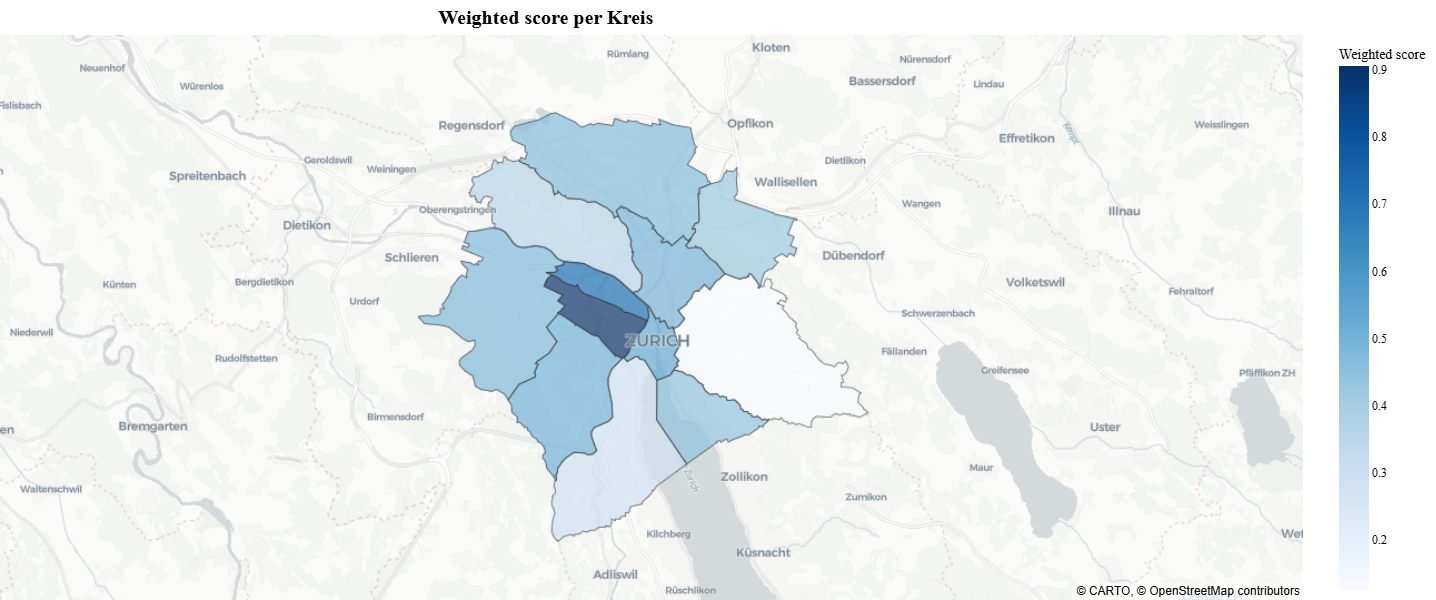

In [13]:
fig = px.choropleth_map(
    top_ranked, 
    color="score",
    geojson=kreise, 
    locations="kreis_number", 
    featureidkey="properties.name",
    hover_data={
        "kreis_number":True,
        "score": ':.2f',
        "Density": ':,.0f',
        "people_per_supermarket":':,.0f',
        "spar_coverage_rate":':.0%',
    },
    center={"lat": 47.38, "lon": 8.54},
    map_style="carto-positron", 
    zoom=10.8,
    opacity=0.7,
    width=900,
    height=600,
    labels={"kreis_number":"Kreis",
           "score":"Weighted score",
           "Density": "Population per km²",
            "people_per_supermarket":"Population per supermarket",
           "spar_coverage_rate":"number of SPAR out of total supermarkets",},
    title="<b>Weighted score per Kreis</b>",
    color_continuous_scale="Blues",
)
fig.update_layout(margin={"r":0,"t":35,"l":0,"b":0},
                  font_family="Balto",
                  font_color="black",
                  hoverlabel={"bgcolor":"white", 
                              "font_size":12,
                             "font_family":"Balto"},
                  title={"font_size":20,
                         "xanchor":"center", "x":0.38,
                        "yanchor":"bottom", "y":0.96}
                 )
fig.show()

In [15]:
import pandas as pd
kreis_df = pd.read_csv("Kreis_Density.csv")
print(kreis_df.columns.tolist())


['Kreis', 'kreis_number', 'District Name', 'Area (km²)', 'pop_2024', 'Density']


In [17]:
import json

with open("stzh.adm_stadtkreise_a.json", "r") as f:
    kreise = json.load(f)

print(kreise['features'][0]['properties'])


{'objid': '6', 'bezeichnung': 'Kreis 7', 'name': '7', 'entstehung': '6'}
